In [2]:
%matplotlib widget
import sys
sys.path.insert(1, '../')
import cv2
import ccl_marker_stack
import numpy
import pyhdf.SD
import netCDF4
import glob
import matplotlib.pyplot as plt
from matplotlib import animation

# MOD08 Data

In [8]:
def load_sds(file_path, sds_name):
    hdf = pyhdf.SD.SD(file_path)
    sds = hdf.select(sds_name)
    scale_factor = sds.attributes()['scale_factor']
    offset = sds.attributes()['add_offset']
    fill_value = sds.attributes()['_FillValue']
    data = sds.get()
    mask = data==-9999
    data = data.astype(numpy.double) * scale_factor + offset
    #data = numpy.ma.array(data, mask=mask)       
    return data

In [9]:
marker_stack = ccl_marker_stack.ccl_marker_stack()
data_thresh_mnmx = (3, 9999)

file_paths = glob.glob('../data/mod08/MOD08_D3*')
sds_name = 'Atmospheric_Water_Vapor_Mean'

In [10]:
for file_path in file_paths:
    data = load_sds(file_path=file_path, sds_name=sds_name)
    marker_stack.make_slice_from(data, data_thresh_mnmx)
    
m_results_translated = marker_stack.resolve_labels_across_stack()

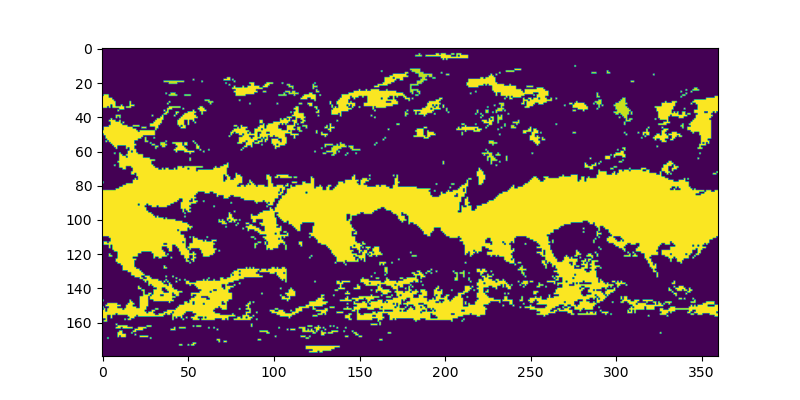

In [13]:
fig = plt.figure(figsize=(8, 4), dpi=100)
ax = fig.add_subplot(111)

im = plt.imshow(m_results_translated[0])

def animate(i):    
    im.set_array(m_results_translated[i])
    return [im]

anim = animation.FuncAnimation(fig,
                               animate,                                
                               frames = len(m_results_translated),
                               interval = 1000, # in ms
                               blit=True)

anim.save('mod08.gif')

# IMERG 

In [4]:
def load_imerg(file_path, variable_name):
    netcdf = netCDF4.Dataset(file_path, 'r', format='NETCDF4')
    data = netcdf.groups['Grid'][variable_name][:][0].T[::-1]
    return data   

In [5]:
file_paths = sorted(glob.glob('../data/imerg/3B-HHR.MS.MRG.3IMERG*'))
variable_name = 'precipitationCal'

## Animate the raw data

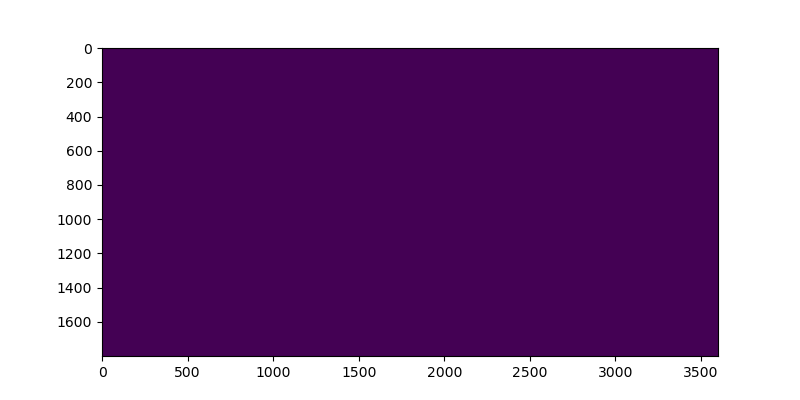

In [18]:
fig = plt.figure(figsize=(8, 4), dpi=100)
ax = fig.add_subplot(111)

raw_stack = []
for file_path in file_paths:
    data = load_imerg(file_path, variable_name)
    data[data<0.001] = numpy.ma.masked
    raw_stack.append(data)
    
im = plt.imshow(numpy.empty(raw_stack[0].shape), animated=True)
    
def animate(i):    
    im.set_array(raw_stack[i])
    return [im]

anim = animation.FuncAnimation(fig,
                               animate,                                
                               frames = len(raw_stack),
                               interval = 1000, # in ms
                               blit=False)

In [ ]:
marker_stack = ccl_marker_stack.ccl_marker_stack()
data_thresh_mnmx = (5, 80)
minimum_pixel_area = 100

for file_path in file_paths:    
    print(file_path)
    data = load_imerg(file_path=file_path, variable_name=variable_name)
    data[data.mask] = 0
    marker_stack.make_slice_from(data.data, 
                                 data_thresh_mnmx, 
                                 thresh_inverse=False,
                                 norm_data=True,
                                 minimum_pixel_area=minimum_pixel_area)

../data/imerg/3B-HHR.MS.MRG.3IMERG.20210110-S000000-E002959.0000.V06B.HDF5
../data/imerg/3B-HHR.MS.MRG.3IMERG.20210110-S003000-E005959.0030.V06B.HDF5
../data/imerg/3B-HHR.MS.MRG.3IMERG.20210110-S010000-E012959.0060.V06B.HDF5
../data/imerg/3B-HHR.MS.MRG.3IMERG.20210110-S013000-E015959.0090.V06B.HDF5
../data/imerg/3B-HHR.MS.MRG.3IMERG.20210110-S020000-E022959.0120.V06B.HDF5
../data/imerg/3B-HHR.MS.MRG.3IMERG.20210110-S023000-E025959.0150.V06B.HDF5
../data/imerg/3B-HHR.MS.MRG.3IMERG.20210110-S030000-E032959.0180.V06B.HDF5
../data/imerg/3B-HHR.MS.MRG.3IMERG.20210110-S033000-E035959.0210.V06B.HDF5
../data/imerg/3B-HHR.MS.MRG.3IMERG.20210110-S040000-E042959.0240.V06B.HDF5
../data/imerg/3B-HHR.MS.MRG.3IMERG.20210110-S043000-E045959.0270.V06B.HDF5
../data/imerg/3B-HHR.MS.MRG.3IMERG.20210110-S050000-E052959.0300.V06B.HDF5
../data/imerg/3B-HHR.MS.MRG.3IMERG.20210110-S053000-E055959.0330.V06B.HDF5
../data/imerg/3B-HHR.MS.MRG.3IMERG.20210110-S060000-E062959.0360.V06B.HDF5
../data/imerg/3B-HHR.MS.M

In [11]:
m_results_translated = marker_stack.resolve_labels_across_stack()

In [13]:
numpy.unique(numpy.array(m_results_translated))

array([  0,   5,   8,  28,  60,  63,  74,  79,  92,  93, 110, 128, 130,
       135, 143, 146, 162, 171, 188, 190, 192, 198, 213, 217, 220, 235,
       238, 240, 245, 267, 274, 275, 286, 308, 313, 325, 326, 332, 334,
       336, 348, 351, 366, 367, 369, 374, 391, 401, 404, 406, 407, 408,
       409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421,
       422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434,
       435, 436, 437, 438, 439])

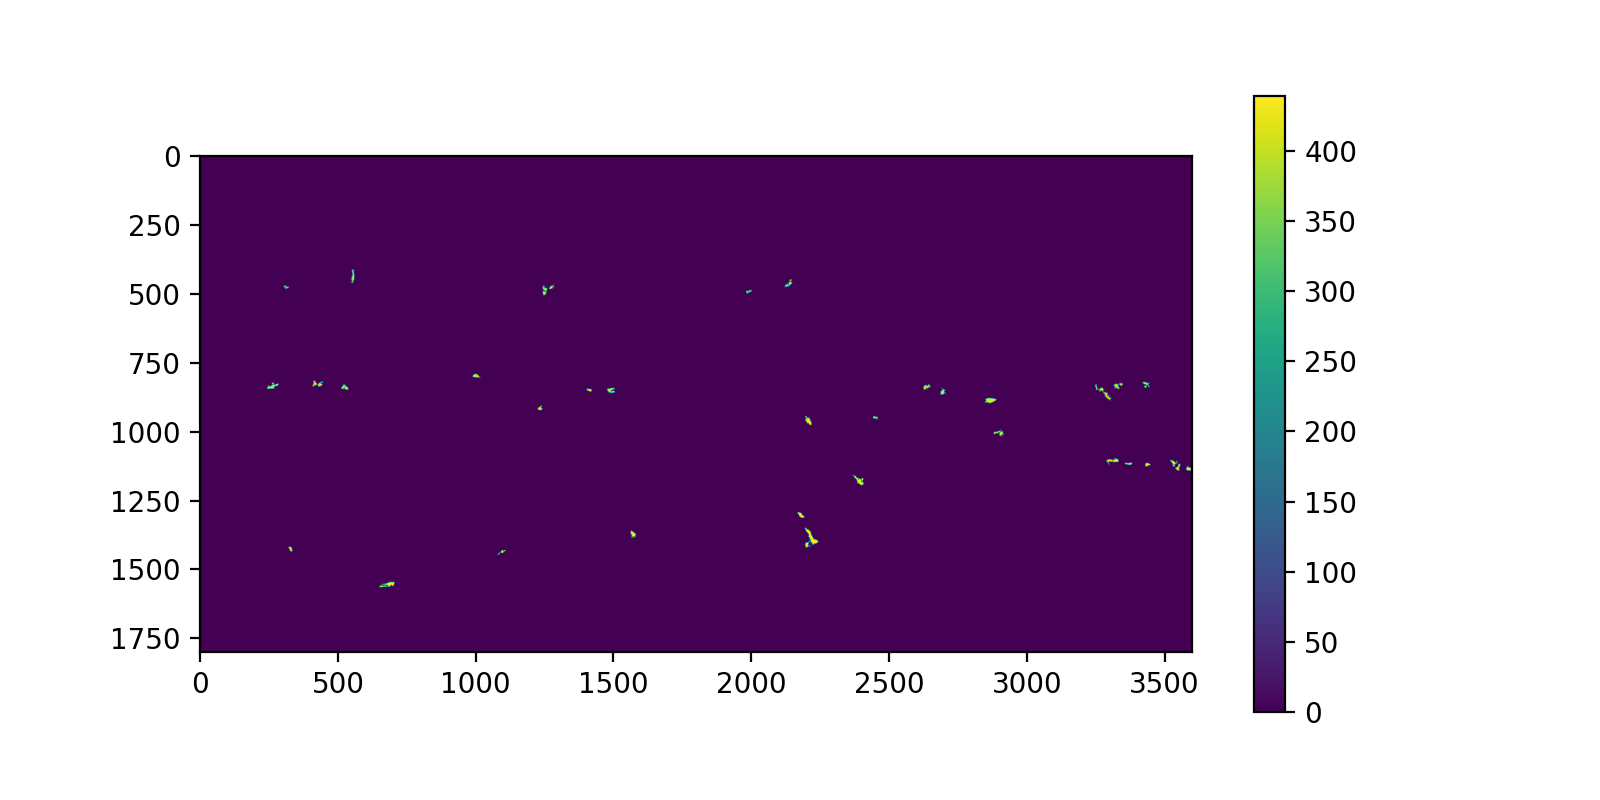

In [14]:
fig = plt.figure(figsize=(8, 4), dpi=200)
ax = fig.add_subplot(111)

im = plt.imshow(m_results_translated[0])

def animate(i):    
    im.set_array(m_results_translated[i])
    return [im]

anim = animation.FuncAnimation(fig,
                               animate,                                
                               frames=len(m_results_translated),
                               interval=1000, # in ms
                               blit=True)

plt.colorbar(orientation='vertical')


anim.save('test_anim.gif', fps=1)

In [52]:
fig = plt.figure(figsize=(8, 4), dpi=200)

data = load_imerg(file_paths[0], variable_name='precipitationCal')

ret, thresh = cv2.threshold(data.data, 1, 100, cv2.THRESH_BINARY)
ret, markers = cv2.connectedComponents(thresh.astype(numpy.uint8))

plt.subplot(1,1,1)
plt.imshow(markers, 'gray')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)